Log For Asteroseismology

Downloading lightkurve data and using the same processing methods, the photometric data was passed through a lombscargle periodogram function within lightkurve and converted to loglog space. Now in frequency space, the pulsations of the star are clearly visible around 100-170 $\mu$Hz. Focusing on this region in linear space allows for the characteristic stellar oscillations of red giants to be observed, in particular the oscillation modes which gives us the large frequency separation Deltanu. Note that the oversample facotr was set to 10 instead of None. This allows the periodogram to be sampled at a higher precision and is integral to producing smooth models later.

By using echelle an echelle diagram was created. In such diagram, the periodogram is folded into sections modulated by Deltanu, with the oscillation modes appearing as dark fringes. Each section of the folded periodogram is related to a high radial order number, increasing along the y-axis. Using the intetractive plot which varied Deltanu, an aprroximate value for Deltanu was determined to be ~10.85. This was taken to be the case where the oscillation modes all lined up. One thing to note here is the occurrence of the modes, and mixed-mode nature of the l=1 mode. In any star, the oscillation modes will always appear in the following order: l=2,0,1, usualy with the dipole and radial mode bordering each other. l=3 is too faint to be seen, but is usually besides l=1. The mixed nature of l=1 is indicative of the coupling between g and p-modes in the evanescence region. As such, the dipole mode is spilt into multiplets according to 2l+1, most of which cannot be seen due to the stochastic nature of the star. In this case, 3 g-dominated modes are seen to border the signular p-dominated mode. 

Depending on the stellar inclination angle, the observed modes can appear either as triplets, doubles or singlets. Since determining the stellar inclination angle is integral to accurately pinning exoplanet parameters, the power spectrum was modelled amongst the dipole modes to determine the best inclination angle of the star. Using the following Lorentzian model, the power spectrum was modelled: $$P = \sum^N_k \sum_{m=-l}^{m=+1} \frac{\epsilon_{lm}(i)h_k}{1-4(\nu-f_k -ms_k)^2 \Gamma^{-2}}+n$$ where $h$ is the mode height, $f$ is the central mode frequency $\Gamma$ is the linewidth, $s$ is the rotational splitting defined to be half the distance between the outer multiplets, $n$ is the arbitrary noise level in the power spectrum. The model is summed over $N$ oscillation modes to be fitted and the azimuthal order $m$ that is apparent. However, the relative height of each peak is given by the $\epsilon_{ml}$, which depends on $m$, the spherical order $l$ and inclination $i$: $$\epsilon_{l,m=0}(i) = \cos^2(i)\\ \epsilon_{l,m=\pm1}(i) = \frac{1}{2}\sin^2(i)$$

The 4 best cases where the splitting is apparent in all diploe modes of the same order were chosen, and a best fit model was used to approximate priors for MCMC sampling. I performed 2 fits: 1 p-dominated l=1 mode and 3 g-domintate l=1 modes. I fit for the central frequency $f$, rotational splitting $s$, linewidth $\Gamma$, inclination angle $i$, noise floor $n$ and mode height $h$, yielding a total of 24 free-parameters. The likelihood function used for the MCMC sampling is given by $$\mathfrak{L}=\Pi_{\nu}\frac{1}{P_m(\nu)}\text{exp}\left(-\frac{P_0(\nu)}{P_m(\nu)} \right)$$ where $P_m(\nu)$ is the model power and $P_0(\nu)$ is the observed power. Due to the scale that $h$ could take, Jeffreys Priors were used to provide an un-biased probability distribution function (since a uniform prior biases priors to large values): $$p(x) = \frac{1}{x\ln(\frac{x_{max}}{x_{min}})}$$ For all other parameters a uniform prior was enforced: $$p(x)=\frac{1}{x_{max}-x_{min}}$$ where $x_{max}$ and $x_{min}$ are the maximum and minimum values the parameter $x$ can take. emcee was used with a burn-in phase of 5,000 steps, after which each MCMC chain was sampled for 60,000 steps. This allows for the posterior to be correctly explored and limits the possibility of falling into local minima.

After sampling finalised for each case, the chains were inspected to ensure convergence. In particular, the corner plots were inspected to make sure the posteriors were gaussian, and to make sure no 2 values were preferred - indicative of a poor sampling. Once the corner plots showed promising results, a final plot was made with the mean and standard deviation of the respective posteriors, showing the final model with MCMC uncertainties.

Finally, the rotational splitting was compared to literature values of stars observed with asteroseismology. It appears that for stars of similar $\nu_{max}$ and $\Delta \nu$ KOI-6194 lies on the edge of the scatter plot, but well within global range of stars observed. This implies already that KOI-6194 might hold large $M_*$ and $R_*$ values from the following scaling relations:
$$ \frac{M_*}{M_{\odot}} = \left(\frac{\nu_{\text{max}}}{\nu_{\text{max},\odot}}\right)^3  \left(\frac{\Delta \nu_*}{\Delta \nu_{\odot}}\right)^{-4} \left(\frac{T_{\text{eff}}}{T_{eff,\odot}}\right)^{3/2},
\frac{R_*}{R_{\odot}} = \left(\frac{\nu_{\text{max}}}{\nu_{\text{max},\odot}}\right) \left(\frac{\Delta \nu_*}{\Delta \nu_{\odot}}\right)^{-2} \left(\frac{T_{\text{eff}}}{T_{eff,\odot}}\right)^{1/2},
\frac{g_*}{g_{\odot}} = \left(\frac{\nu_{\text{max}}}{\nu_{\text{max},\odot}}\right) \left(\frac{T_{\text{eff}}}{T_{eff,\odot}}\right)^{1/2}
$$
with the associated uncertainties:
$$\Delta \left( \frac{M_*}{M_{\odot}}\right)= \frac{M_*}{M_{\odot}} \sqrt{\left(3\frac{\Delta (\Delta \nu_*)}{\Delta \nu_*}\right)^2 + \left(4\frac{\Delta (\nu_{\text{max}})}{\nu_{\text{max}}}\right)^2 + \left(\frac{3}{2}\frac{\Delta (T_{\text{eff}})}{T_{\text{eff}}}\right)^2}\\
\Delta \left( \frac{R_*}{R_{\odot}}\right)= \frac{R_*}{R_{\odot}} \sqrt{\left(2\frac{\Delta (\Delta \nu_*)}{\Delta \nu_*}\right)^2 + \left(\frac{\Delta (\nu_{\text{max}})}{\nu_{\text{max}}}\right)^2 + \left(\frac{1}{2}\frac{\Delta (T_{\text{eff}})}{T_{\text{eff}}}\right)^2}\\
\Delta \left(\frac{g_*}{g_{\odot}}\right)= \frac{g_*}{g_{\odot}} \sqrt{ \left(\frac{\Delta (\nu_{\text{max}})}{\nu_{\text{max}}}\right)^2 + \left(\frac{1}{2}\frac{\Delta (T_{\text{eff}})}{T_{\text{eff}}}\right)^2}
$$
It should be noted that only the rotational splitting in the final observable radial order were fitted as lower orders exhibited stochastic variations intrinsic to the star, meaning the expected doublet apears as a singlet. This is apparent at the p-dominated dipole mode located at 128$\mu$Hz. Such effects can bias the lorentzian modelling towards lower values of $i$, and hence should be ignored in the model. Prior to the modelling the rotationally split dipole mixed-modes immaediately rule out inconsistent stellar inclinations since the signature triplet (indicative of $i\in [0,90)$ deg) is not apparent in any splitting. As such, a rough estimate of $i\approx 90^{\circ}$ was performed with the simulated inclination being $i_{\text{MCMC},av} = (89.560 \pm 0.006)^{\circ}$, lying only $0.434^{\circ}$ from the approximated value. Whilst this usually would mean the true obliquity $\psi$ can be calculated, we cannot determine the sky-projected obliquity $\lambda$ due to its degeneracy. The Rossiter-McGlauchlin effect is required to resolve this, incorporating instense spectroscopic sampling of the star during a transit event and is dependant on the stellar rotation period and the ratio of radii $R_{pl}/R_*$ (find this equation). However, since rad giants are known to rotate very slowly, are massive and hence $R_{pl}/R_*$, the deviation expected from the RM effect is easily smeared by teh stochastic nature of the star. As such, we cannot confirm whether the system is truley aligned, but can confidently say it is consistent with alignment.

Accurate determination of $\nu_{\text{max}}$ and $\Delta \nu$ require further, more advance studies of the lightcurve and power spectrum. After extracting only the time and flux from the lightcurve to a .txt file labelled "9145861_LC", the python package "Pysyd" was used to determine $\nu_{\text{max}}$ and $\Delta \nu$ with uncertainties. It shold be noted that the power spectrum was converted to a lightkurve object, where a similar process in saving the .txt file with the name "9145861_PS" was undertaken. These file had to be placed in a certain folder to be read by pysyd (C:\Users\justv\Desktop\Workspace\Exoplanet\echelle\data), where the results are located in C:\Users\justv\Desktop\Workspace\Exoplanet\echelle\results .


In [1]:
import numpy as np, lightkurve as lk, matplotlib.pyplot as plt, echelle, pandas as pd
%matplotlib inline
lcfs = lk.search_lightcurve(
    "KIC 9145861", author="Kepler"
).download_all() #all long cadence data, no short cadence data
lc = lcfs.stitch().remove_nans().remove_outliers().normalize() # type: ignore

time = np.ascontiguousarray(lc.time.value, dtype=np.float64)
flux = np.ascontiguousarray(lc.flux, dtype=np.float64)
flux_err = np.ascontiguousarray(lc.flux_err,dtype=np.float64)

/home/justv/anaconda3/envs/RV/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/justv/.lightkurve/cache. Please move all the files in the legacy directory /home/justv/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
# lc['time','flux'].to_excel('9145861_LC.xlsx')
# pg = lcfs.stitch().normalize(unit='ppm').to_periodogram(normalization='psd', oversample_factor=10)
# pglc = lk.LightCurve(time=pg.frequency.value, flux=pg.power.value)
# pglc.to_excel('9145861_PS.xlsx')

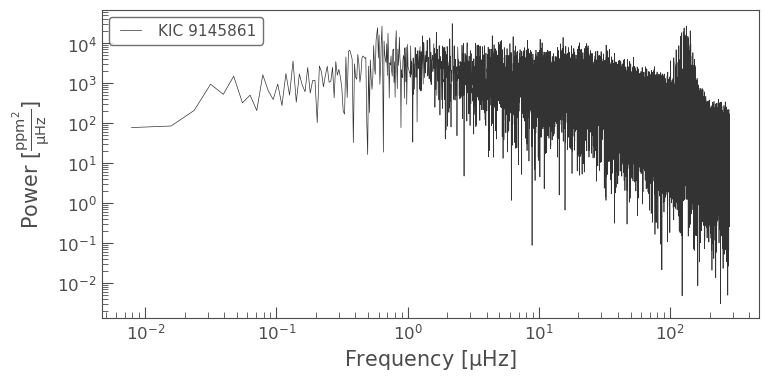

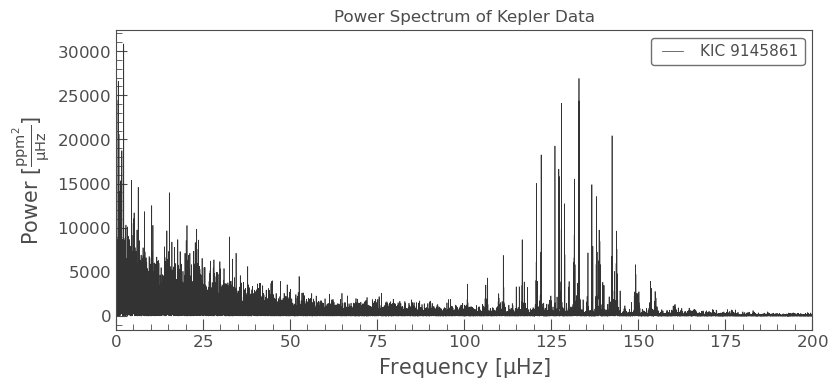

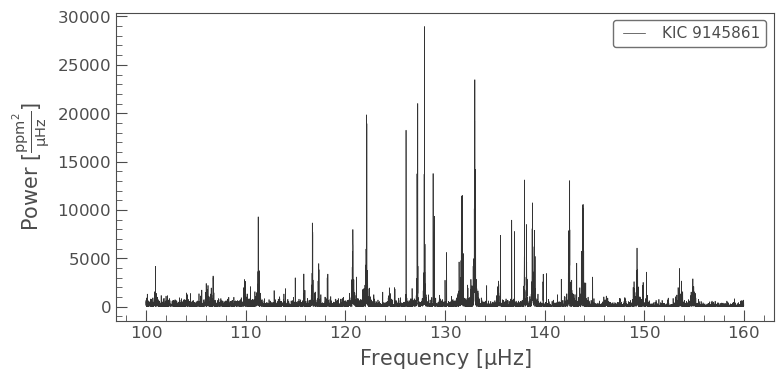

In [2]:
periodogram_astero = lcfs.stitch().normalize(unit='ppm').to_periodogram(normalization='psd', oversample_factor=1)
periodogram_astero.plot(scale='log');
periodogram_astero.plot();
plt.xlim(0,200)
plt.title('Power Spectrum of Kepler Data')
plt.tight_layout()
plt.savefig('Oscillations.png')
zoom_periodogram_astero = lcfs.stitch().normalize(unit='ppm').to_periodogram(normalization='psd', oversample_factor=1,
                                                                             minimum_frequency=100,maximum_frequency=160)
zoom_periodogram_astero.plot();

In [3]:
# # time parameters
# from matplotlib.pyplot import gcf
# from astropy.timeseries import LombScargle


# tmax = time.max()/86400
# tmin = time.min()/86400
# df = 1.0 / (tmax - tmin)
# oversample_factor = 5 #increases periodogram detail at cost of computation

# # frequency parameters
# fmin = df
# fmax = 0.5 / np.median(np.diff(time/86400)) #nyquist frequency
# freq = np.arange(fmin, fmax, df / oversample_factor)

# model = LombScargle(time/86400,flux)
# power = model.power(freq, method='fast', normalization='psd')

# #amplitude spectrum
# fct = np.sqrt(4.0 / len(time/86400))
# amp = np.sqrt(power) * fct

# # power spectrum
# P = amp**2

# N = len(time/86400)
# nu = 0.5 * (fmin + fmax)
# power_window = (LombScargle(time/86400, np.sin(2 * np.pi * nu * time/86400)).power(freq, normalization='psd')/N*4.0)
# Tobs = 1.0 / np.sum(np.median(freq[1:] - freq[:-1])*power_window)

# # power spectral density
# p = (LombScargle(time/86400,flux).power(freq,normalization='psd')/N*4.0)*Tobs

# fig_astero, axes = plt.subplots(4,1, figsize=(15,10),sharex=False,sharey=False)
# freq = freq * 10E-6
# ax = axes[0]
# ax.loglog(freq,P)

# ax = axes[1]
# ax.plot(freq, P)

# ax = axes[2]
# ax.plot(freq,P)
# ax.set_xlim(8,12)
# ax.set_xlabel("Frequency ($\mu Hz$)",fontsize=20)
# ax = axes[3]
# ax.plot(1/freq,P)
# ax.set_xlim(0,15)
# ax.set_xlabel("Period ($\mu s$)",fontsize=20)
# _ = fig_astero.text(0.08, 0.5, 'Power', ha='center', va='center', rotation='vertical',fontsize=20)

# # fig_astero.savefig('AsterStuff.png',dpi=80,facecolor='w')

In [4]:
# %matplotlib inline
# fig, ax = plt.subplots(figsize=(10,8))
# frequency = periodogram_astero.frequency.value
# amplitude = periodogram_astero.power.value
# c = echelle.plot_echelle(frequency,amplitude,10.85, scale='sqrt',ax=ax
#                      ,cmap='Blues',interpolation='none',smooth=False,fmin=90,fmax=190)

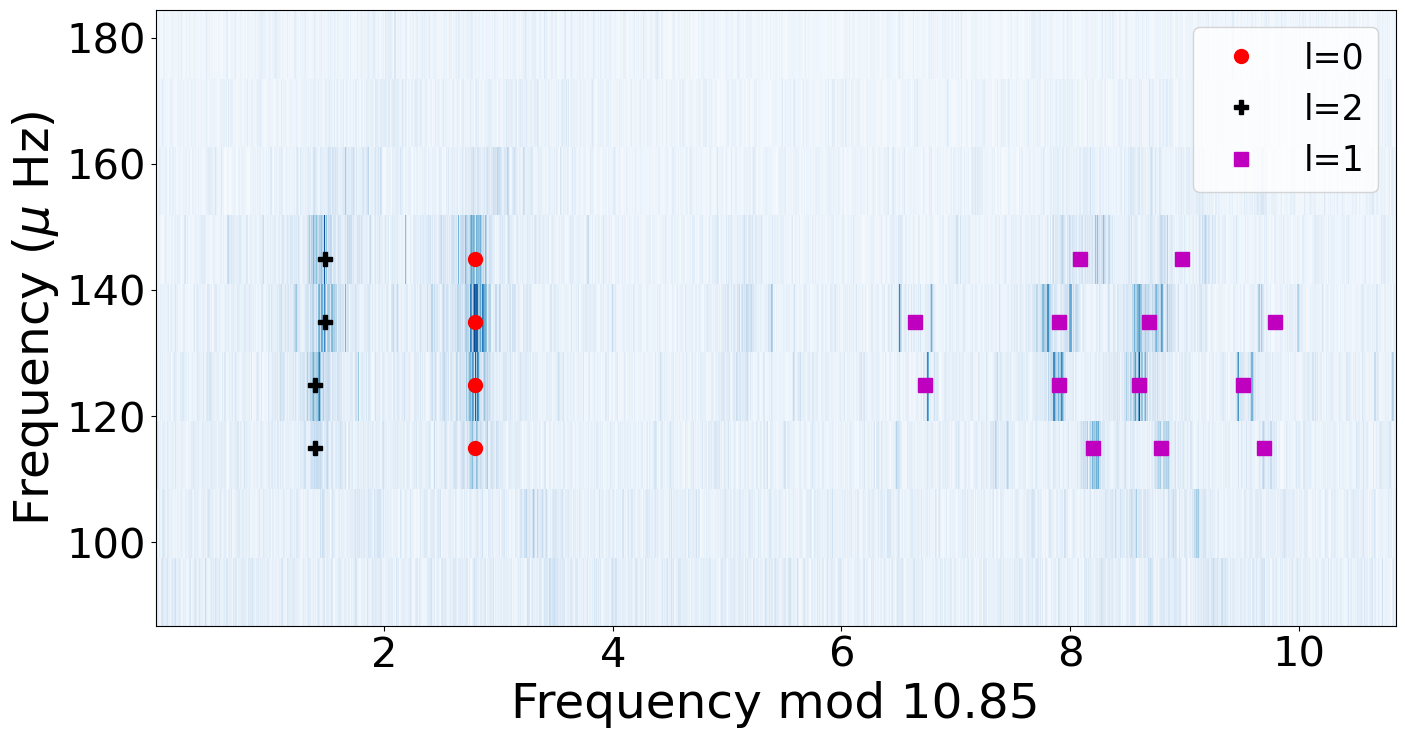

In [16]:
# hiding the axis for [0,0] and [0,1]
figure_astero, axes = plt.subplots(1,1, figsize=(16,8),sharex=False,sharey=False)
fontsize = 35
labelsize=30
frequency = periodogram_astero.frequency.value
amplitude = periodogram_astero.power.value

ax = axes
echelle.plot_echelle(frequency,amplitude,10.85, scale='sqrt',ax=ax
                     ,cmap='Blues',interpolation='none',smooth=False,fmin=90,fmax=190)
ax.set_xlabel('Frequency mod 10.85',fontsize=fontsize)
ax.set_ylabel('Frequency ($\mu$ Hz)',fontsize=fontsize)
ax.tick_params(axis='both', labelsize=labelsize) 

#highlighting l=0 mode
ax.plot(2.79,125,'or',markerfacecolor='r',label='l=0',markersize=10)
ax.plot(2.79,115,'or',markerfacecolor='r',markersize=10)
ax.plot(2.79,135,'or',markerfacecolor='r',markersize=10)
ax.plot(2.79,145,'or',markerfacecolor='r',markersize=10)
#highlighting l=2 mode
ax.plot(1.39,125,'Pk',markerfacecolor='k',label='l=2',markersize=10)
ax.plot(1.39,115,'Pk',markerfacecolor='k',markersize=10)
ax.plot(1.48,135,'Pk',markerfacecolor='k',markersize=10)
ax.plot(1.48,145,'Pk',markerfacecolor='k',markersize=10)
#highlighting l=1 modes
ax.plot(6.73,125,'sm',markerfacecolor='m',label='l=1',markersize=10)
ax.plot(7.90,125,'sm',markerfacecolor='m',markersize=10)
ax.plot(8.60,125,'sm',markerfacecolor='m',markersize=10)
ax.plot(9.51,125,'sm',markerfacecolor='m',markersize=10)
ax.plot(6.64,135,'sm',markerfacecolor='m',markersize=10)
ax.plot(7.90,135,'sm',markerfacecolor='m',markersize=10)
ax.plot(8.69,135,'sm',markerfacecolor='m',markersize=10)
ax.plot(9.79,135,'sm',markerfacecolor='m',markersize=10)
ax.plot(8.09,145,'sm',markerfacecolor='m',markersize=10)
ax.plot(8.98,145,'sm',markerfacecolor='m',markersize=10)
ax.plot(8.20,115,'sm',markerfacecolor='m',markersize=10)
ax.plot(8.80,115,'sm',markerfacecolor='m',markersize=10)
ax.plot(9.70,115,'sm',markerfacecolor='m',markersize=10)
ax.legend(fontsize=25)
plt.savefig('echelle_diagram.png',facecolor='w',dpi=100,bbox_inches='tight')

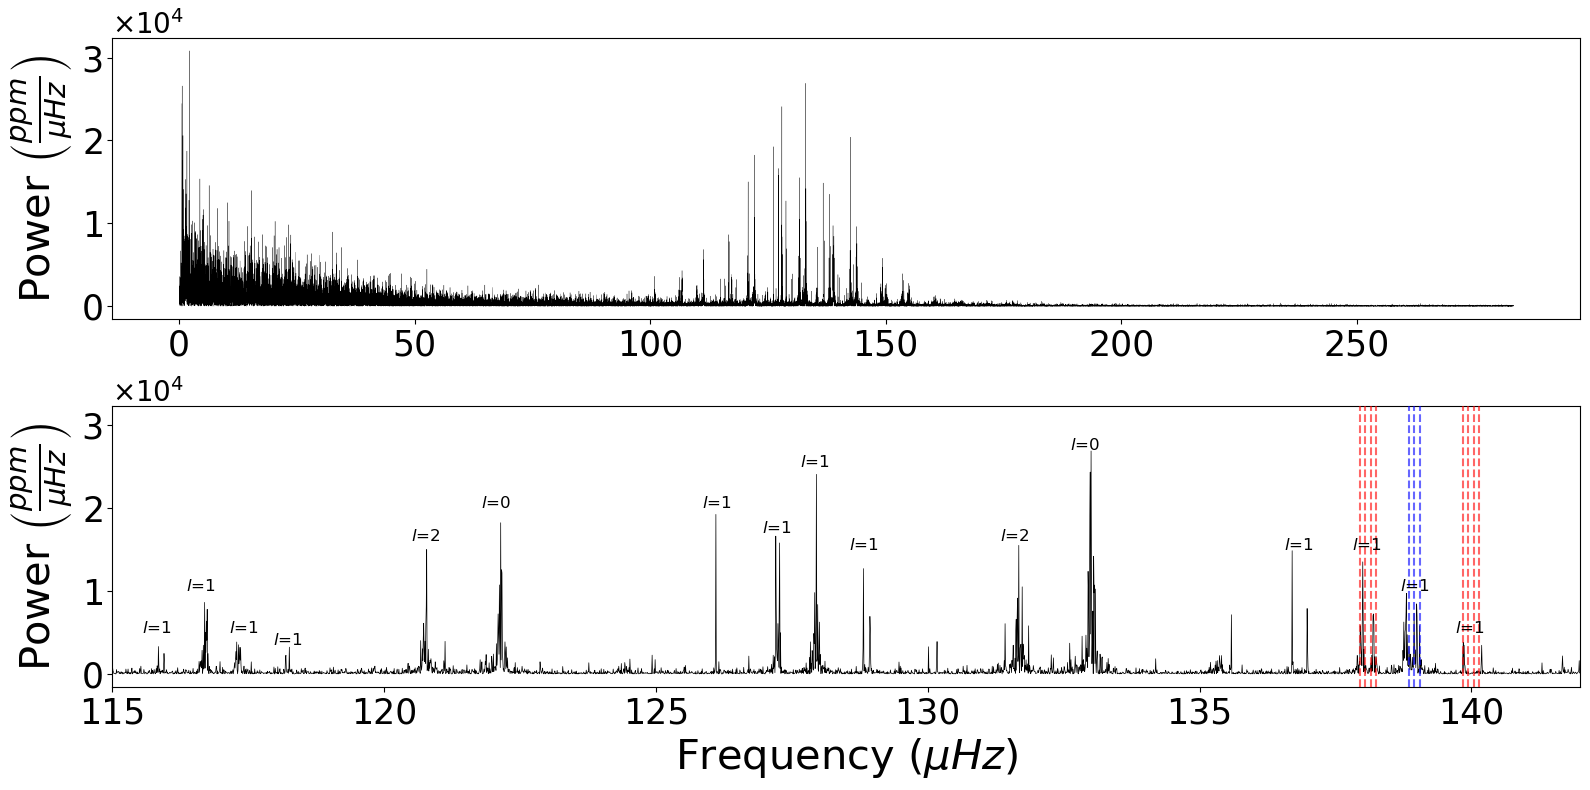

In [33]:
from matplotlib import colors
from matplotlib.ticker import ScalarFormatter
%matplotlib inline

figure_astero, axes = plt.subplots(2,1, figsize=(16,8),sharex=False,sharey=False)
fontsize = 30
labelsize=25
frequency = periodogram_astero.frequency.value
amplitude = periodogram_astero.power.value

ax_top = axes[0]
# ax_top = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax_top.plot(frequency, amplitude, 'k',linewidth=0.2)
# ax_top.set_xlabel('Frequency',fontsize=fontsize)
ax_top.set_ylabel('Power $\\left(\\frac{ppm}{\mu Hz}\\right)$',fontsize=fontsize)
ax_top.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_top.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax_top.yaxis.get_offset_text().set_fontsize(20)
ax_top.tick_params(axis='both', labelsize=labelsize) 

# ax.legend()
ax=axes[1]
ax.plot(frequency,amplitude,c='k',lw=0.5)
Dnu = 10.847187784253878 # from the below deltanu approximation
g_mode1= [127.1,127.4]
g_mode2 = [128.7,129.0]
outer_gmode = [125.9,126.4]
p_mode = [127.8,128.1]
mono_mode = [120.36,121.21]
duo_mode = [121.57,122.58]

def ColumnPlot(mode,step,nu,colour,alpha,linestyle,y,Line,text=''):
    ave = np.average(mode)+nu
    if Line is True:
        for xpos in np.arange(mode[0], mode[1], step):
            ax.axvline(x=xpos+nu, c=colour, linestyle=linestyle, alpha=alpha,zorder=1000)
        ax.text(ave-0.3,y,text,fontsize=12,zorder=2000)
    else:
        ax.text(ave-0.3,y,text,fontsize=12)
    return

ColumnPlot(outer_gmode,0.1,-10.3,'r',0.3,':',5000,False,'$l$=1')
ColumnPlot(g_mode1,0.1,-10.6,'r',0.3,':',10000,False,'$l$=1')
ColumnPlot(g_mode2,0.1,-10.6,'r',0.3,':',3500,False,'$l$=1')
ColumnPlot(p_mode,0.1,-10.5,'b',0.3,':',5000,False,'$l$=1')

ColumnPlot(outer_gmode,0.1,0,'r',0.3,':',20000,False,'$l$=1')
ColumnPlot(g_mode1,0.1,0,'r',0.3,':',17000,False,'$l$=1')
ColumnPlot(g_mode2,0.1,0,'r',0.3,':',15000,False,'$l$=1')
ColumnPlot(p_mode,0.1,0,'b',0.3,':',25000,False,'$l$=1')
ColumnPlot(mono_mode,0.1,0,'b',0.3,':',16000,False,'$l$=2')
ColumnPlot(duo_mode,0.1,0,'b',0.3,':',20000,False,'$l$=0')

ColumnPlot(outer_gmode,0.1,10.7,'r',0.6,'--',15000,False,'$l$=1')
ColumnPlot(g_mode1,0.1,Dnu,'r',0.6,'--',15000,True,'$l$=1')
ColumnPlot(g_mode2,0.1,Dnu+.3,'r',0.6,'--',5000,True,'$l$=1')
ColumnPlot(p_mode,0.1,Dnu+.2,'b',0.6,'--',10000,True,'$l$=1')
ColumnPlot(mono_mode,0.1,Dnu,'b',0.6,'--',16000,False,'$l$=2')
ColumnPlot(duo_mode,0.1,Dnu,'b',0.6,'--',27000,False,'$l$=0')

ax.set_xlabel('Frequency ($\mu Hz$)',fontsize=fontsize)
ax.set_ylabel('Power $\\left(\\frac{ppm}{\mu Hz}\\right)$',fontsize=fontsize) 
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(20)
ax.tick_params(axis='both', labelsize=labelsize) 
_= ax.set_xlim(115,142)
plt.tight_layout()
plt.savefig('Mode_identification.png',dpi=300)
# plt.close()

MCMC

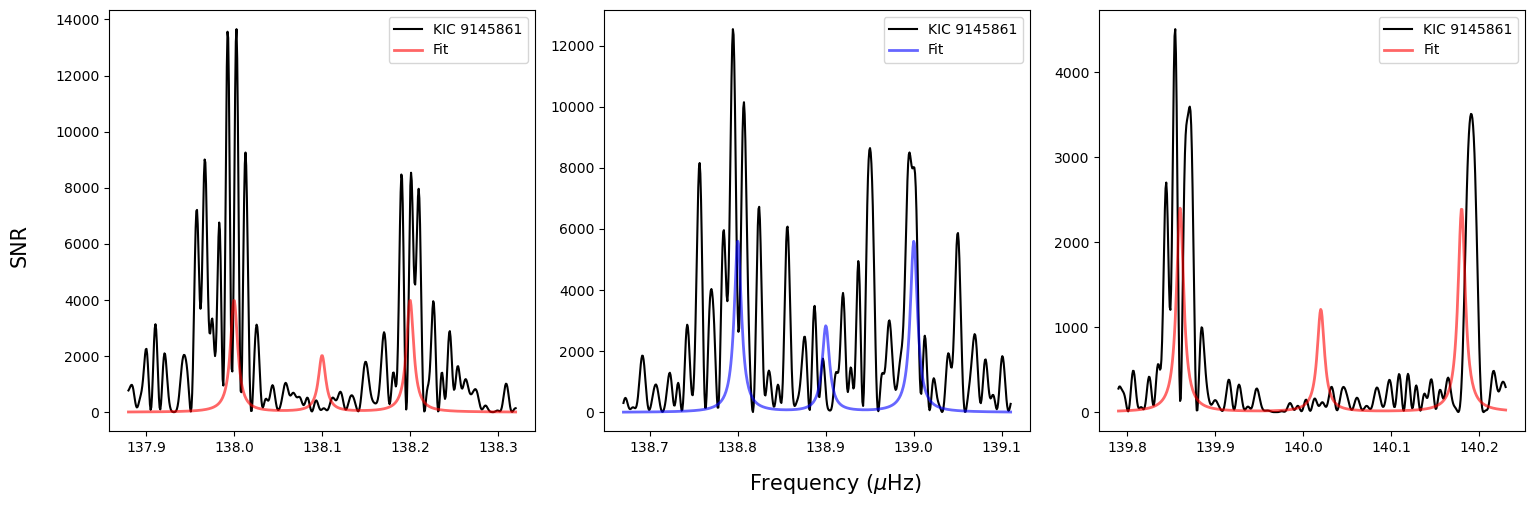

In [8]:
%matplotlib inline
np.random.seed(123)

p_mode_central2 = [138.67,139.11]
g_mode_central3 = [137.88,138.32]
g_mode_central4 = [139.79,140.23]
modes = [g_mode_central3,p_mode_central2,g_mode_central4]

# prior parameters.
f = np.array([138.1,138.9,140.02])
s = [0.1,0.1,0.16] #separation from m=0 mode
h = [1.0E+4,1.4E+4,6.0E+3] #height of peak
i = 90 #inclination
Γ = 0.01 #linewidth
n=0 #noise floor

def PowerSpectrum(nu,f,s,h,Γ,i,n):
    ε_0 = np.cos(i)**2
    ε_1 = 0.5 * np.sin(i)**2
    P = ε_1*h*(1/(1+4*(nu - f - 1*s)**2 * Γ**(-2)) + 1/(1+4*(nu - f + 1*s)**2 * Γ**(-2))) + ε_0*h/(1+4*(nu - f )**2 * Γ**(-2)) + n
    return P

j = 0
fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=False,sharey=False)
while j < len(f):
    def Period_Aster(modes,Norm = ""):
        f_min= (modes[j])[0]
        f_max = (modes[j])[1]
        p_periodogram_astero = lcfs.stitch().normalize(unit='ppm').to_periodogram(normalization=Norm,minimum_frequency=f_min,
                                                                                maximum_frequency=f_max, oversample_factor=10)
        periodo_freq = p_periodogram_astero.frequency.value
        periodo_power = p_periodogram_astero.power.value
        return periodo_freq, periodo_power

    periodo_freq, periodo_power = Period_Aster(modes,'psd')
    ax = axes[j]
    y = PowerSpectrum(periodo_freq,f[j],s[j],h[j],Γ,i,n)
    x0 = np.linspace((modes[j])[0], (modes[j])[1],len(y))
    ax.plot(periodo_freq,periodo_power,c="k",label="KIC 9145861")
    if j == 1 or j == 4:
        ax.plot(x0,y,"b",alpha=0.6,lw=2,label="Fit")
    else:
        ax.plot(x0,y,"r",alpha=0.6,lw=2,label="Fit")
    j += 1
    _ = ax.legend()

fig.text(0.53, 0.01, "Frequency ($\mu$Hz)", ha='center', fontsize=15)
_ = fig.text(-0.02, 0.5, "SNR", va='center', rotation='vertical', fontsize=15)
plt.tight_layout(rect=[0, 0.05, 1, 1])

Priors, Maximum likelihood estimates:
f_1 = 138.100, 138.093
s_1 = 0.100, 0.111
h_1 = 20000.000, 12482.486
Γ_1 = 0.025, 0.043
i_1 = 90.000, 89.535
n_1 = 112.000, 70.113
f_2 = 138.890, 138.894
s_2 = 0.100, 0.097
h_2 = 20000.000, 8711.370
Γ_2 = 0.025, 0.088
i_2 = 90.000, 89.535
n_2 = 60.000, -102.344
f_3 = 140.020, 140.025
s_3 = 0.160, 0.166
h_3 = 6000.000, 6281.469
Γ_3 = 0.025, 0.018
i_3 = 90.000, 89.611
n_3 = 90.000, 86.774


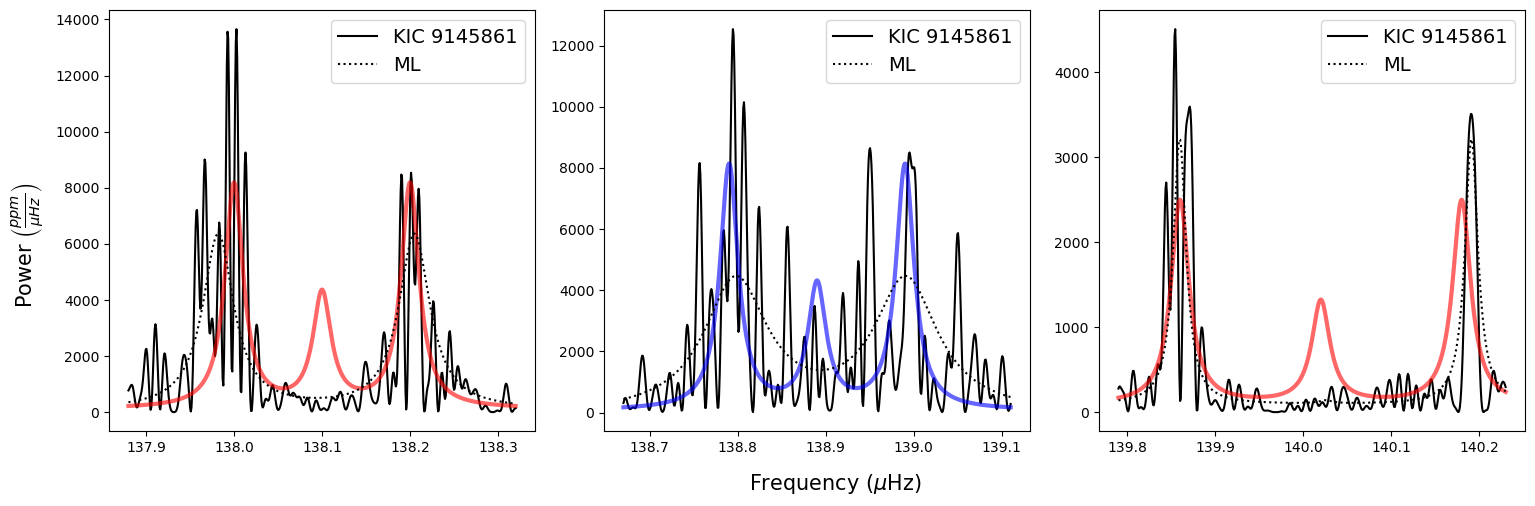

In [9]:
from scipy.optimize import minimize
j=0

f = np.array([138.1,138.89,140.02]) 
s = np.array([0.1,0.1,0.16]) 
h = np.array([2.0E+4,2.0E+4,6.0E+3]) 
i = 90 
Γ = np.array([0.025,0.025,0.025]) 
n = np.array([112,60,90]) 

fig, axes = plt.subplots(1,len(f), figsize=(15,5), sharex=False,sharey=False)

#defining the log likelihood of the model matching the data
def log_likelihood(params, *args):
    f, s, h, Γ, i, n = params
    F, A = args
    k = len(F)
    log_model = -k * np.log(PowerSpectrum(F, f, s, h, Γ, i,n)) - np.sum(A / PowerSpectrum(F, f, s, h, Γ, i,n))
    return -np.sum(log_model)

while j < len(f):
    periodo_freq, periodo_power = Period_Aster(modes,'psd')
        
    args = (periodo_freq,periodo_power)
    initial = np.array([f[j],s[j],h[j],Γ[j],i,n[j]])  #+ 0.01 * np.random.randn(5)
    soln = minimize(log_likelihood, initial,args=args)
    f_ml, s_ml, h_ml,Γ_ml, i_ml,n_ml = soln.x

    if j==0:
        print("Priors, Maximum likelihood estimates:")
    print("f_{0} = {1:.3f}, {2:.3f}".format(j+1,f[j],f_ml))
    print("s_{0} = {1:.3f}, {2:.3f}".format(j+1,s[j],s_ml))
    print("h_{0} = {1:.3f}, {2:.3f}".format(j+1,h[j],h_ml))
    print("Γ_{0} = {1:.3f}, {2:.3f}".format(j+1,Γ[j],Γ_ml))
    print("i_{0} = {1:.3f}, {2:.3f}".format(j+1,i,i_ml))
    print("n_{0} = {1:.3f}, {2:.3f}".format(j+1,n[j],n_ml))

    ax = axes[j%3]
    ax.plot(periodo_freq,periodo_power,"k",label="KIC 9145861")
    
    y_ml = PowerSpectrum(periodo_freq,f_ml,s_ml,h_ml,Γ_ml,i_ml,n_ml)
    y = PowerSpectrum(periodo_freq,f[j],s[j],h[j],Γ[j],i,n[j])
    x0 = np.linspace((modes[j])[0], (modes[j])[1],len(y))
    if j==1 or j==4:
        ax.plot(x0, y, "b", alpha=0.6, lw=3)
    else:
        ax.plot(x0, y, "r", alpha=0.6, lw=3)
    ax.plot(x0, y_ml, ":k", label="ML")
    j+=1
    _ = ax.legend(fontsize=14,loc='upper right')

plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.text(0.53, 0.01, "Frequency ($\mu$Hz)", ha='center', fontsize=15)
_ = fig.text(-0.02, 0.5, "Power $\\left(\\frac{ppm}{\mu Hz}\\right)$", va='center', rotation='vertical', fontsize=15)

In [10]:
import emcee

j=0
sample_no = []
while j < len(f):
    periodo_freq, periodo_power = Period_Aster(modes,'psd')
    
    #for mode heights
    def Jeff_priors(x_min,x_max,x):
        p_jeff = 1/(x*np.log(x_max/x_min))
        return p_jeff

    # for anything else
    def Uniform_prior(x_min,x_max):
        p_uni = 1/(x_max-x_min)
        return p_uni

    #defines the log priors
    def log_prior(theta):
        f,s,h,Γ,i,n = theta
        if not (136.5<f<145 and 0.01<s<0.17 and 0< Γ <0.09  and 88<i<91 and 0<n<186):
            return -np.inf
        if not (100<h<15000):
            return -np.inf
        jeff_prior=-np.log(h)
        return jeff_prior

    #combines prior with log_likelihood defined above
    def log_probability(theta, F,A):
        lp = log_prior(theta)
        if not np.isfinite(lp):
            return -np.inf
        return lp - log_likelihood(theta, F, A)

    #MCMC Sampling
    pos = soln.x + 1e-4 * np.random.randn(32, 6)
    nwalkers, ndim = pos.shape

    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability, args=(periodo_freq, periodo_power)
    )
    print("Burn in for iteration number: {0}".format(j+1))
    state = sampler.run_mcmc(pos,5000)
    sampler.reset()
    print('Complete!')
    print("Running MCMC for iteration number: {0}".format(j+1))
    sampler.run_mcmc(state, 10000, progress=True)

    samples = sampler.get_chain()
    sample_no.append(sampler)
    labels = ["f", "s","h","Γ","i","n"]
    j+=1

Burn in for iteration number: 1
Complete!
Running MCMC for iteration number: 1


100%|██████████| 10000/10000 [00:22<00:00, 437.38it/s]


Burn in for iteration number: 2
Complete!
Running MCMC for iteration number: 2


100%|██████████| 10000/10000 [00:20<00:00, 499.34it/s]


Burn in for iteration number: 3
Complete!
Running MCMC for iteration number: 3


100%|██████████| 10000/10000 [00:23<00:00, 432.82it/s]


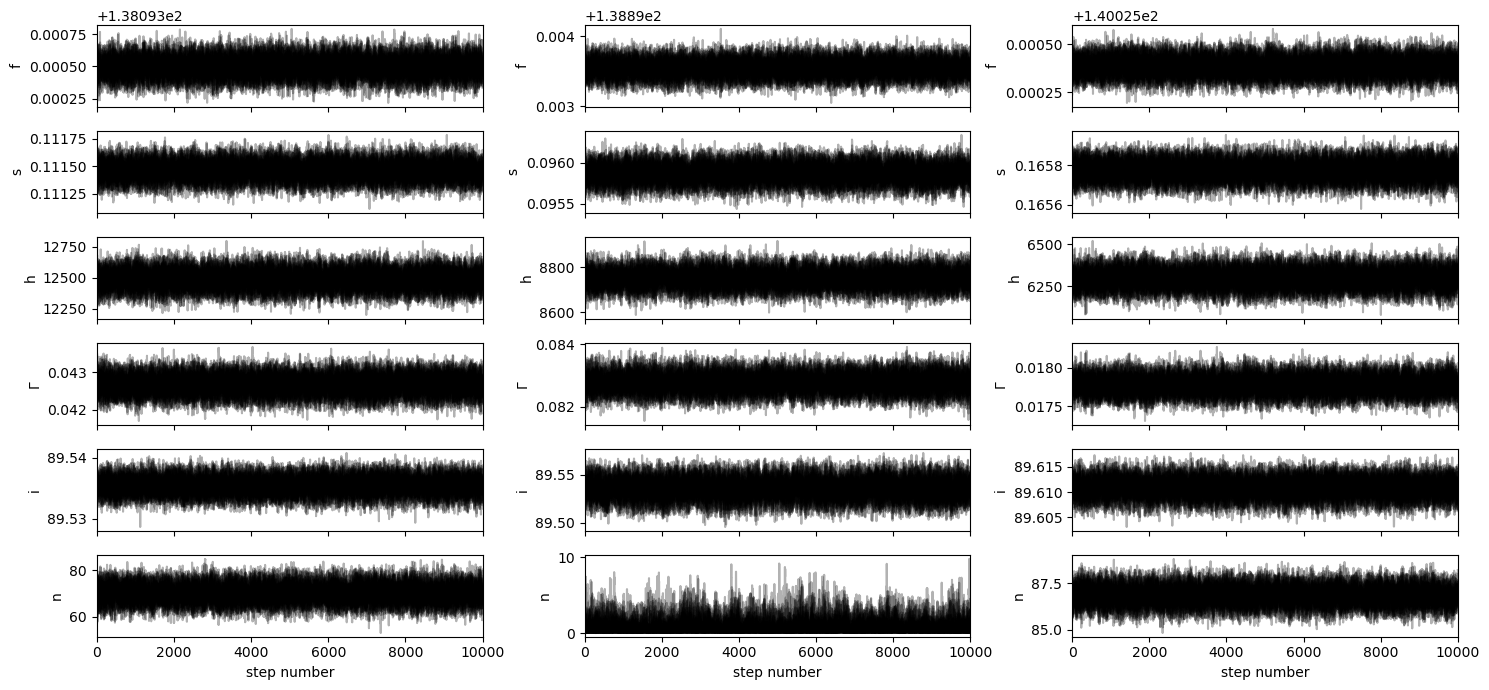

In [30]:
j = 0
fig, axes = plt.subplots(6,len(f), figsize=(15, 7), sharex=True)
while j < len(f):
    plot_chains = sample_no[j].get_chain()
    for i in range(ndim):
        ax = axes[i,j]
        ax.plot(plot_chains[:,:,i], "k", alpha=0.3)
        ax.set_xlim(0, len(plot_chains[:,:,i]))
        ax.set_ylabel(labels[i])
        axes[-1,j].set_xlabel("step number")
    j+=1
fig.tight_layout()
fig.savefig('astero_MCMC_chain_oversample.png',dpi=300)

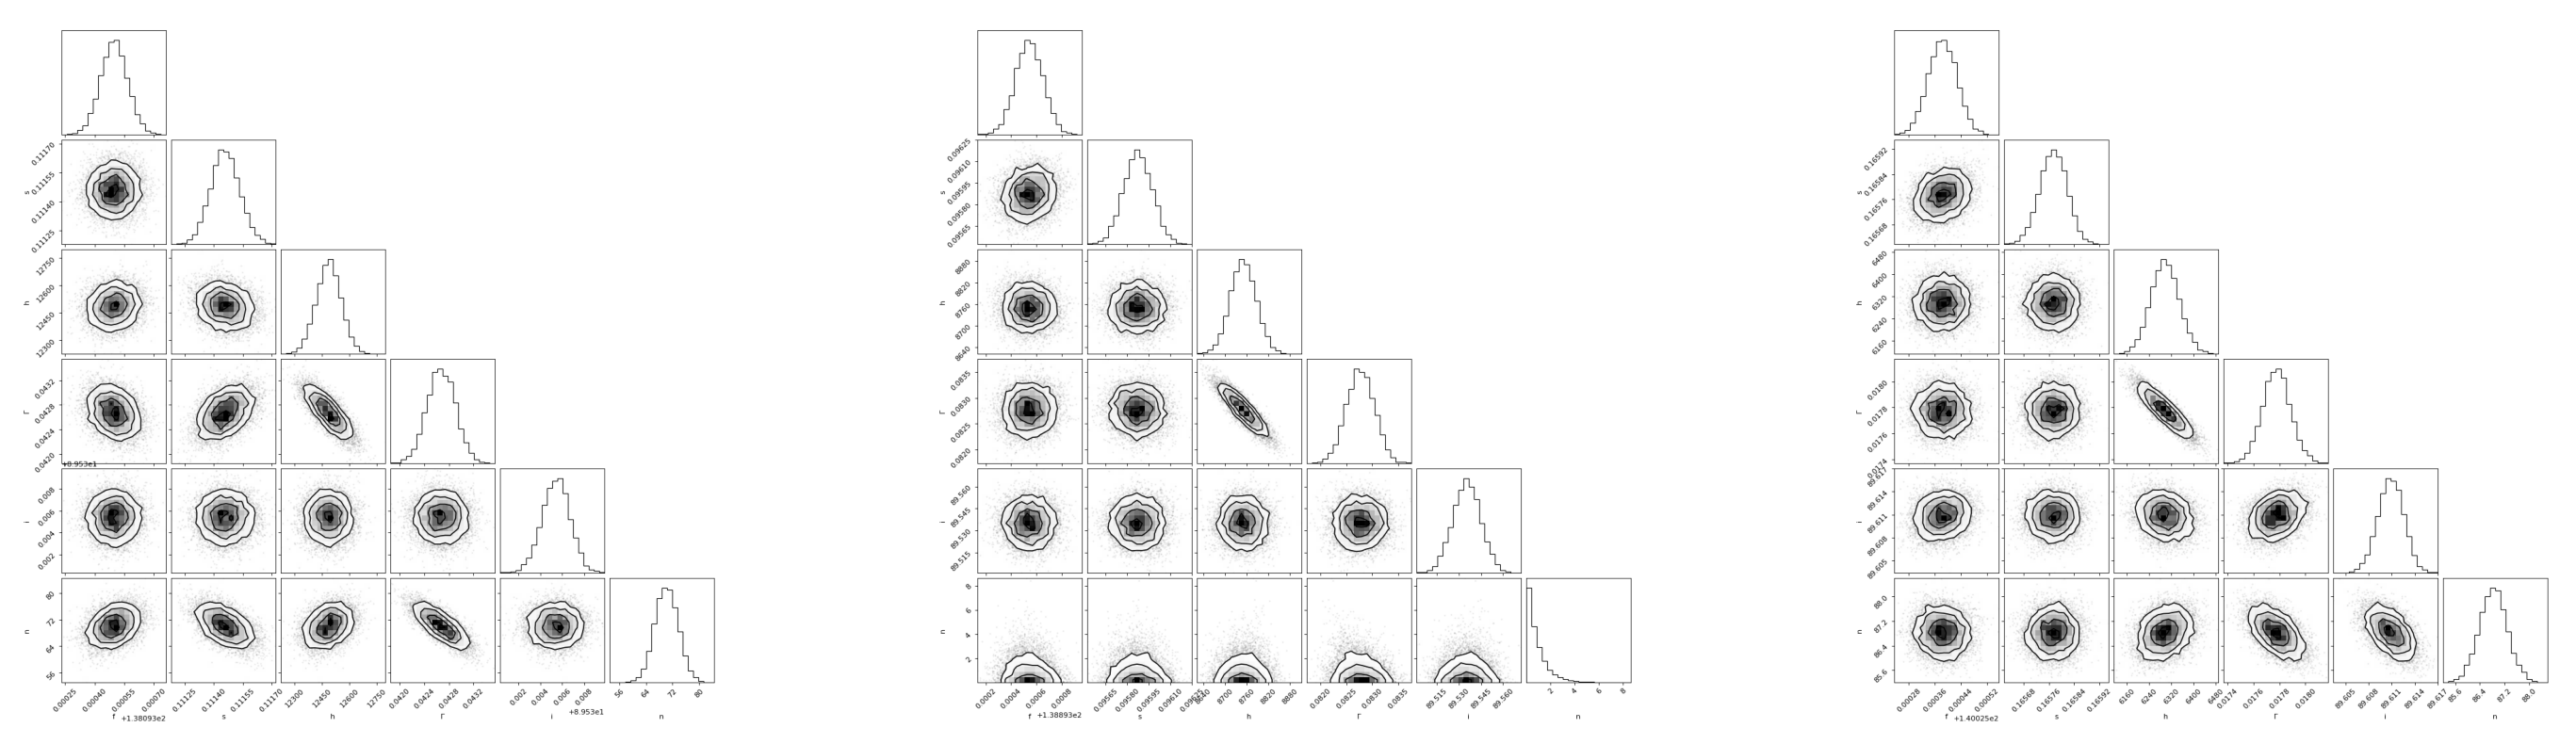

In [25]:
import corner
from PIL import Image
# number of steps before chain forgets where it started
j=0
fig, axes = plt.subplots(1,len(f),figsize=(30,8))
while j<len(f):
    # tau = (sample_no[j]).get_autocorr_time()
    # print(tau)
    
    # discard first 100 steps (i.e. burn in)
    flat_samples = sample_no[j].get_chain(discard=1000, thin=40, flat=True)
    # print(flat_samples.shape)

    #save and load image to put on subplot
    fig_corner = corner.corner(flat_samples, labels=labels, truths=[f[j],s[j],h[j],Γ[j], i,n[j]])
    fig_corner.savefig('astero_corner_{0}.png'.format(j+1),dpi=80)
    plt.close(fig_corner)

    img = Image.open("astero_corner_{0}.png".format(j+1))
    axes[j].imshow(img)
    axes[j].axis('off')
    j+=1
plt.tight_layout()
plt.savefig('Combined_astero_corner_over_samp.png',dpi=300)
# plt.show()
    

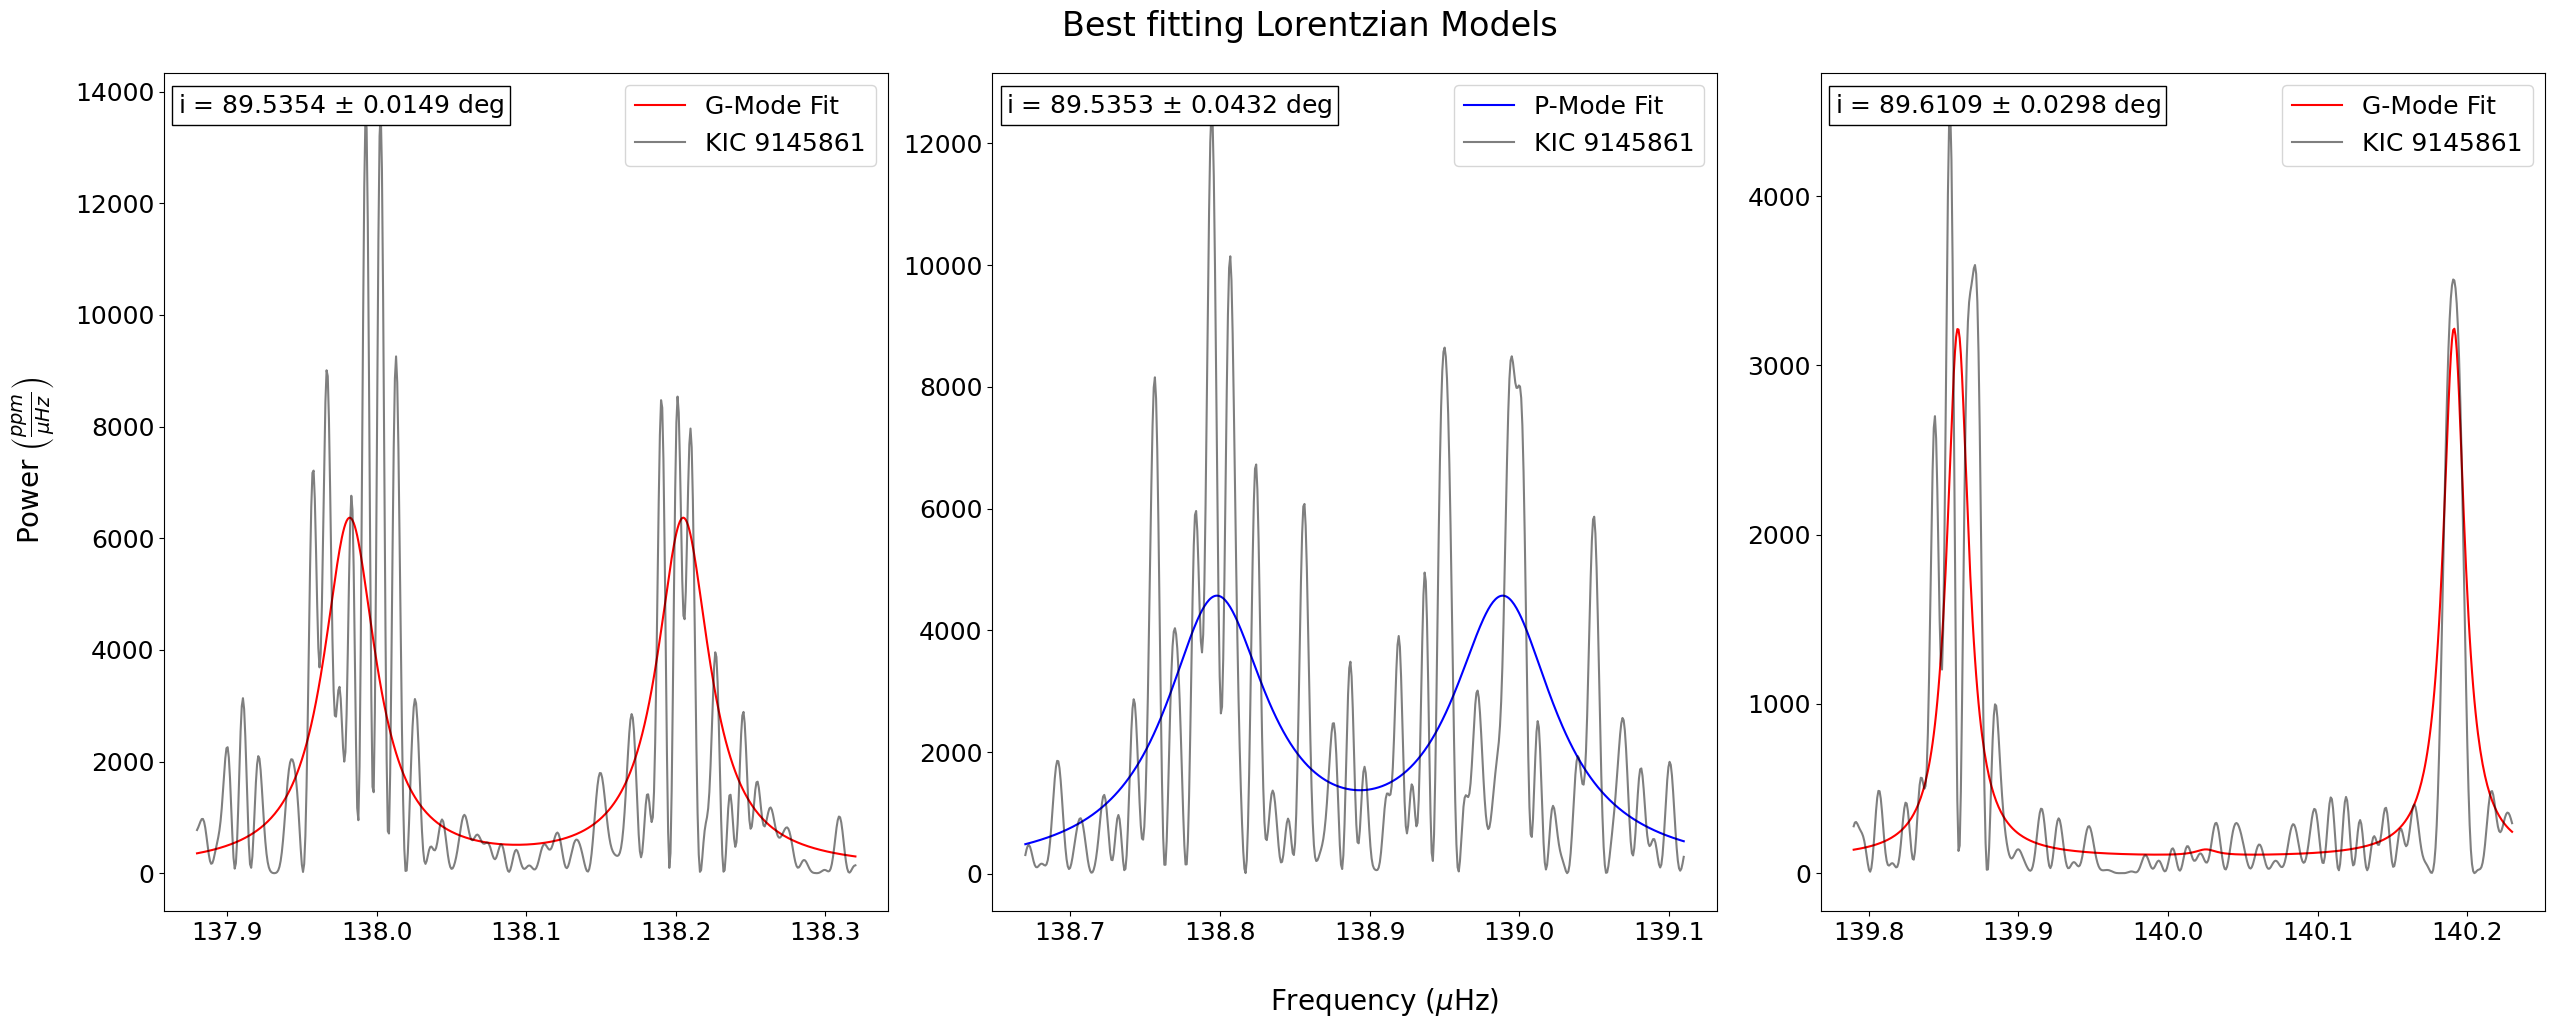

In [26]:
j=0
f_av = []
s_av = []
Gamma_av = []
i_av = []
n_av = []
h_av = []

i_err_crit_samp = [0.014872277454632557, 0.04323960014430891, 0.029802739526005057]
f_err_crit_samp = [0.0006783968581530429, 0.0011451668628977938, 0.0004413549424660917]
s_err_crit_samp = [0.0006571218748640631, 0.0010720352060909263, 0.00044247669007281185]
Γ_err_crit_samp = [0.0017664395375452623, 0.0031104148634926187, 0.0011064370057476346]
n_err_crit_samp = [21.311228060454493, 36.20356756012507, 4.163884694765514]
h_err_crit_samp = [622.4628569311474, 370.821050161232, 500.00433083867307]

figure_lorentz, axes = plt.subplots(1,len(f),figsize=(25,10),sharex=False,sharey=False)
while j < len(f):
    flat_samples = sample_no[j].get_chain(discard=1000, thin=40, flat=True)
    f_trace = np.mean(flat_samples[:,0])
    f_trace_err = f_err_crit_samp[j]
    f_av.append(f_trace)
    s_trace = np.mean(flat_samples[:,1])
    s_trace_err = s_err_crit_samp[j]
    s_av.append(s_trace)
    Γ_trace = np.mean(flat_samples[:,3]) 
    Γ_trace_err = Γ_err_crit_samp[j]
    Gamma_av.append(Γ_trace)
    i_trace = np.mean(flat_samples[:,4])
    i_trace_err = i_err_crit_samp[j]
    i_av.append(i_trace) 
    n_trace = np.mean(flat_samples[:,5])
    n_trace_err = np.std(flat_samples[:,5])
    n_av.append(n_trace)
    h_trace = np.mean(flat_samples[:,2])
    h_trace_err = h_err_crit_samp[j]
    h_av.append(h_trace)
    
    periodo_freq, periodo_power = Period_Aster(modes,'psd')

    # txt_1 = "f = {0:.4f} $\pm$ {1:.4f} $\mu$Hz".format(
    #     f_trace, f_trace_err
    # )
    # txt_2 = "s = {0:.4f} $\pm$ {1:.4f}".format(
    #     s_trace, s_trace_err
    # )
    # txt_3 = "Γ = {0:.4f} $\pm$ {1:.4f}".format(
    #     Γ_trace, Γ_trace_err
    # )
    txt_4 = "i = {0:.4f} $\pm$ {1:.4f} deg".format(
        i_trace, i_trace_err
    )
    # txt_5 = "h = {0:.4f} $\pm$ {1:.4f} ".format(
    #     h_trace, h_trace_err
    # )
    # txt_6 = "n = {0:.4f} $\pm$ {1:.4f} ".format(
    #     n_trace, n_trace_err
    # )
    
    def Annotate(txt, a,b,fontsize):
        ax.annotate(
        txt,
        (0, 0),
        xycoords="axes fraction",
        xytext=(a,b),
        textcoords="offset points",
        ha="left",
        va="bottom",
        fontsize=fontsize,
        bbox=dict(facecolor='white')
        )      

    Astero_text = '''{0}'''.format(txt_4)
    
    Y = PowerSpectrum(periodo_freq,f[j],s[j],h[j],Γ[j],i,n[j])
    Y_trace = PowerSpectrum(periodo_freq,f_trace,s_trace,h_trace,Γ_trace,i_trace,n_trace)
    x0 = np.linspace((modes[j])[0], (modes[j])[1],len(Y_trace))
    ax = axes[j]
    if j == 1:
        ax.plot(x0, Y_trace,"b",label="P-Mode Fit")
    else:
        ax.plot(x0, Y_trace,"r", label="G-Mode Fit")
    ax.plot(periodo_freq,periodo_power,"k",alpha=0.5,label = "KIC 9145861")
    Annotate(Astero_text,10,570,18)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.legend(fontsize=18,loc='upper right')
    j+=1
figure_lorentz.text(0.53, -0.05, "Frequency ($\mu$Hz)", ha='center', fontsize=20)
figure_lorentz.text(-0.02, 0.5, "Power $\\left(\\frac{ppm}{\mu Hz}\\right)$", va='center', rotation='vertical', fontsize=20)
figure_lorentz.suptitle('Best fitting Lorentzian Models',x=0.5,y=0.95,fontsize=24)
plt.tight_layout()
# _ = figure_lorentz.text(-0.02, 0.5, "SNR", va='center', rotation='vertical', fontsize=18)
figure_lorentz.savefig('MCMC Over_Samp Splitting Fit.png',dpi=300,bbox_inches='tight')

Inclination deviation = 0.0256
Inclination error deviation = 0.0095


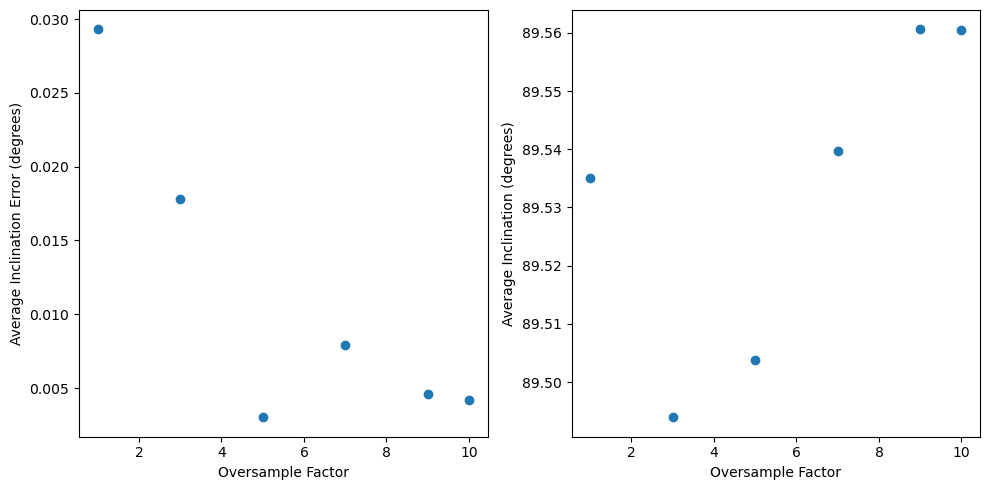

In [27]:
err_1 = [0.014872277454632557, 0.04323960014430891, 0.029802739526005057]
err_3 = [ 0.029732025652488985, 0.005835827198202107] #0.1975693131084666,
err_5 = [0.002572079524412688,  0.0034593341011521337] #0.11067453365726942,
err_7 = [ 0.013328675070007767, 0.002443493524493704] #0.19343387119621686,
err_9 = [0.0014242663880745473, 0.010454309383009217, 0.0018696229377657702]
err_10 = [0.001295569362834723, 0.009568209011501828,0.0017166083554789658] 
errs = [err_1,err_3,err_5,err_7,err_9,err_10]

i_1 = [89.53523534774214,89.53446130726302,89.53567510589214]
i_3 = [89.4844578364582,89.53524522016278,89.4620934311936]
i_5 = [89.53536012102703,89.51525433787627,89.46054471400997]
i_7 = [89.4741650985098 ,89.53514907458319,89.60983156669198 ]
i_9 = [89.53537151786968, 89.5353626847712,89.61107828363379]
i_10 = [89.535355215445,89.53515735427173,89.61080820904385]
inc = [i_1,i_3,i_5,i_7,i_9,i_10]

i_av = []
err_av = []
for l in range(len(errs)):
    errs_mean = np.mean(errs[l])
    i_mean = np.mean(inc[l])
    err_av.append(errs_mean)
    i_av.append(i_mean)
σ_i = np.std(i_av)
σ_err = np.std(err_av)

print("Inclination deviation = {:.4f}".format(σ_i))
print("Inclination error deviation = {:.4f}".format(σ_err))
# print(len(err_av))
x0 = np.arange(1,10,2)
x1 = np.array([10])
x = np.concatenate((x0,x1))
fig, axes = plt.subplots(1,2, figsize=(10,5),sharex=True, sharey=False)
ax = axes[0]
ax.scatter(x,err_av)
ax.set_ylabel('Average Inclination Error (degrees)')
ax.set_xlabel('Oversample Factor')

ax = axes[1]
ax.scatter(x,i_av)
ax.set_ylabel('Average Inclination (degrees)')
ax.set_xlabel('Oversample Factor')
_ = fig.tight_layout()

In [28]:
from IPython.display import display, Math

def Unc(Delf,f,val):
    return val * np.sqrt((Delf/f)**2)

# s_mean = np.mean(s_av)
# s_mean_err = np.std(s_av)
i_mean = np.mean(i_av)
i_mean_err = np.std(i_av)

# s_av_result = r"s_{1} = {0:.4f} \pm {2:.4f} \mu Hz".format(s_mean,"{av}",s_mean_err)
i_av_result = r"i_{1} = {0:.4f} \pm {2:.4f} deg".format(i_mean,"{av}",i_mean_err)
display(Math(i_av_result)) #Math(s_av_result),


<IPython.core.display.Math object>

In [29]:
from IPython.display import display, Math
j=0

while j<len(f):
    for i in range(ndim):
        flat_samples = sample_no[j].get_chain(discard=1000, thin=40, flat=True)
        mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        txt = "\mathrm{{{3}}}_{4} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
        txt = txt.format(mcmc[1], q[0], q[1], labels[i],j+1)
        display(Math(txt))
    j+=1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

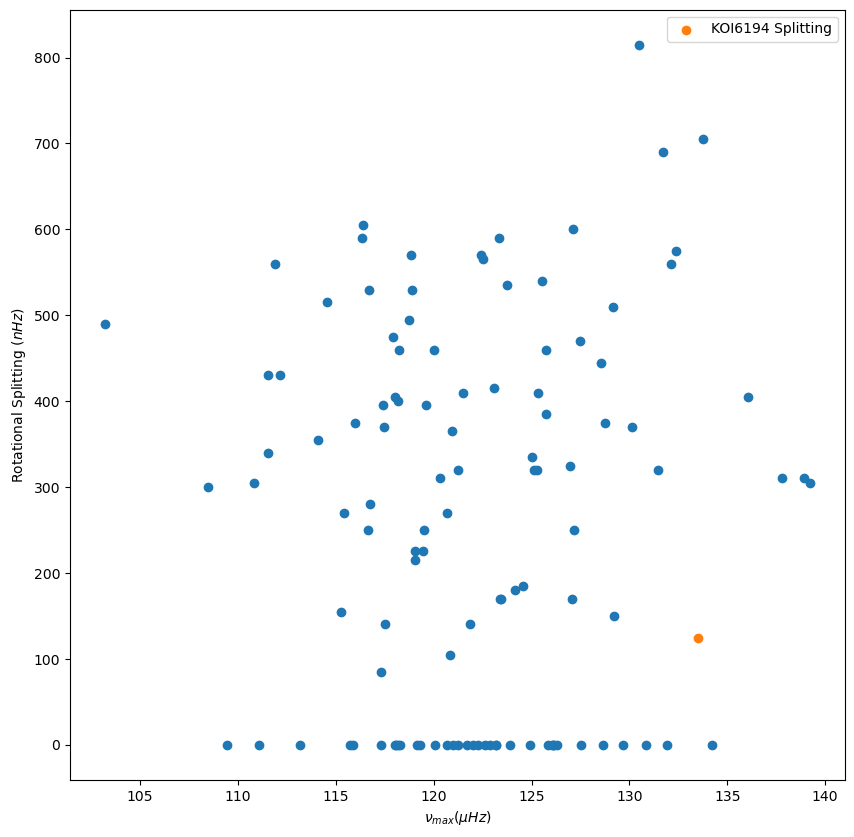

In [18]:
import pandas as pd, matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
data = pd.read_csv('Other_rot_splittings.csv',delimiter="|")
data = data[["KIC","dnurot","numax"]]

grouped_data = data.groupby('KIC')
rot = grouped_data["dnurot"]
Numax = grouped_data["numax"]

# print(rot)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.scatter(data["numax"],data["dnurot"])
plt.scatter(133.50,s_mean*10**(3),label='KOI6194 Splitting')
plt.ylabel('Rotational Splitting ($nHz$)')
plt.xlabel("$\\nu_{max} (\mu Hz)$")
_ = plt.legend()
# _ = plt.xticks(rotation=60)

In [16]:
import numpy as np
from IPython.display import display, Math

Dnu_py = 10.8528055933202
Dnu_py_err = 0.0118878675769049
numax_py = 132.9002135
numax_py_err = 0.840213138650746
Teff_HIRES = 4725.29
Teff_HIRES_err = 100

def MassRelation(Dnu, numax,T):
    nu_maxsolar = 3090
    Dnu_solar = 135.1
    T_eff_solar = 5777.2
    return (numax/nu_maxsolar)**3 * (Dnu/Dnu_solar)**(-4) * (T/T_eff_solar)**(3/2)

def MassUnc(Dnu,Dnu_err,numax,numax_err,T,T_err):
    return MassRelation(Dnu_py,numax_py,Teff_HIRES) * np.sqrt((3* Dnu_err/Dnu)**2 + (4 * numax_err/numax)**2 + ((3/2) * T_err/T)**2)

def RadRelation(Dnu, numax,T):
    nu_maxsolar = 3090
    Dnu_solar = 135.1
    T_eff_solar = 5777.2
    return (numax/nu_maxsolar) * (Dnu/Dnu_solar)**(-2) * (T/T_eff_solar)**(1/2)
def RadUnc(Dnu,Dnu_err,numax,numax_err,T,T_err):
    return RadRelation(Dnu_py,numax_py,Teff_HIRES) * np.sqrt(( Dnu_err/Dnu)**2 + (2 * numax_err/numax)**2 + ((1/2) * T_err/T)**2)

def GravRelation(numax,T):
    nu_maxsolar = 3090
    T_eff_solar = 5777.2
    return (numax/nu_maxsolar) * np.sqrt(T/T_eff_solar)

def GravUnc(numax,numax_err,T,T_err):
    return GravRelation(numax_py,Teff_HIRES) * np.sqrt( ( numax_err/numax)**2 + ((1/2) * T_err/T)**2)

M_result = r"M_* = ({0:.4f}  \pm {2:.4f}) M_{1}".format(MassRelation(Dnu_py,numax_py,Teff_HIRES),r"\odot",MassUnc(Dnu_py,Dnu_py_err,numax_py,numax_py_err,Teff_HIRES,Teff_HIRES_err))
R_result = r"R_* = ({0:.4f} \pm {2:.4f}) R_{1}".format(RadRelation(Dnu_py,numax_py,Teff_HIRES),r"\odot",RadUnc(Dnu_py,Dnu_py_err,numax_py,numax_py_err,Teff_HIRES,Teff_HIRES_err))
g_result = r"g_* = ({0:.4f} \pm {2:.4f}) {1}".format(GravRelation(numax_py,Teff_HIRES),r'(dex)',GravUnc(numax_py,numax_py_err,Teff_HIRES,Teff_HIRES_err))
display(Math(M_result),Math(R_result),Math(g_result))

0.03889759332733898


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Comparing to Lightkurve

In [10]:
#removes background noise
%matplotlib inline
snr = periodogram_astero.flatten()

In [11]:
#converts to lightkurve seismology object so we can use lightkurve tools
seismology = snr.to_seismology()

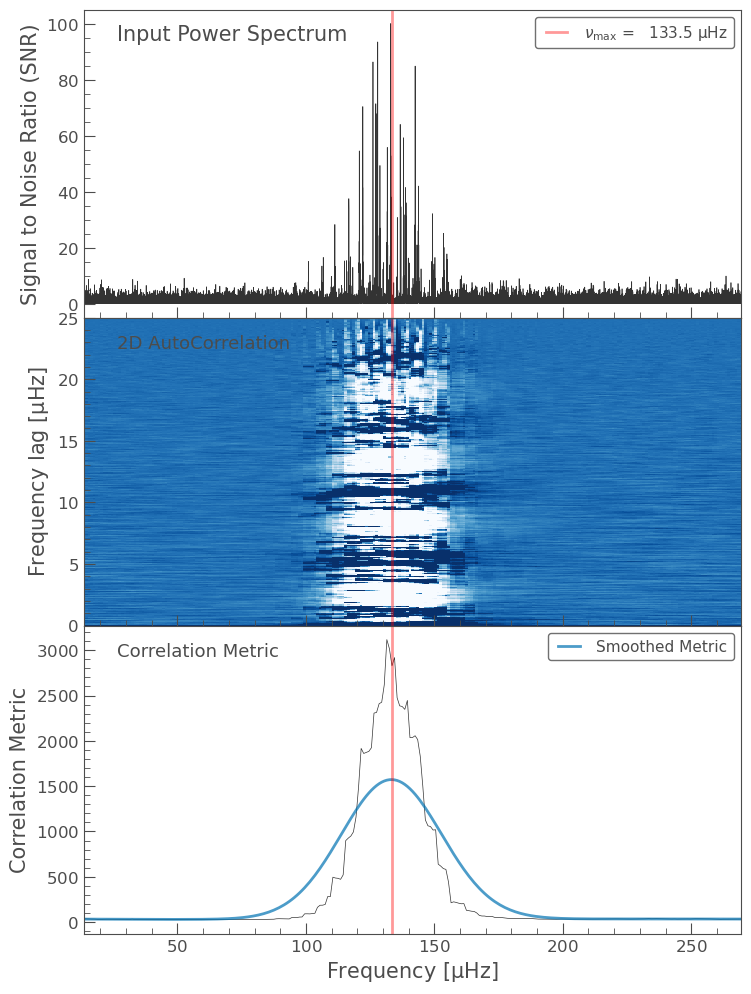

In [12]:
#uses autocorrelation
seismology.estimate_numax();
seismology.diagnose_numax();

<Axes: xlabel='Frequency Lag [$\\mathrm{\\mu Hz}$]', ylabel='Scaled Auto Correlation'>

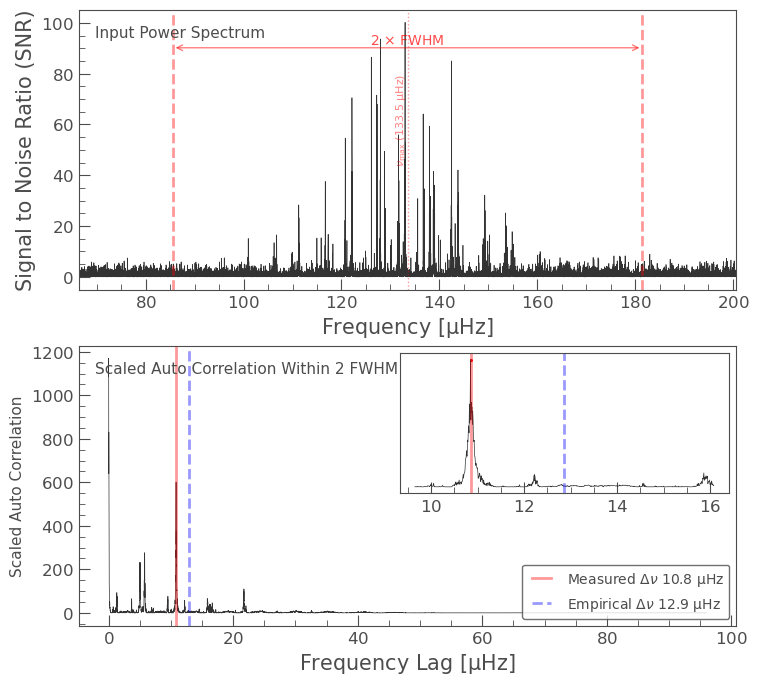

In [13]:
seismology.estimate_deltanu()
seismology.diagnose_deltanu()
# print(seismology.deltanu)

In [14]:
seismology.estimate_mass()
seismology.estimate_radius()
seismology.estimate_logg()
seismology

Seismology(ID: KIC 9145861) - computed values:
 * numax: 133.50 uHz (method: ACF2D)
 * deltanu: 10.85 uHz (method: ACF2D)
 * mass: 1.53 solMass (method: Uncorrected Scaling Relations)
 * radius: 6.19 solRad (method: Uncorrected Scaling Relations)
 * logg: 3.04 dex (method: Uncorrected Scaling Relations)